# Jupyter Notebook: Learn the mesoscale organzation of shallow convection 

<a name="top"></a>


### A composite manifestation by [meteorologists(2019)](https://elib.dlr.de/131194/1/Stevens_et_al-2019-Cloud%20Patterns%20in%20Trades%20QJRMS.pdf), [public scientsts(still open)](https://www.zooniverse.org/projects/raspstephan/sugar-flower-fish-or-gravel) and [deep learning technique](https://arxiv.org/abs/1906.01906).

### There is an example for [Kaggle competition: Understanding Clouds from Satellite Images](https://www.kaggle.com/c/understanding_cloud_organization).

### Model training from [Notebook: Segmentation in PyTorch using convenient tools](https://www.kaggle.com/artgor/segmentation-in-pytorch-using-convenient-tools#Preparing-data-for-modelling) by Andrew Lukyanenko.

![cloud classification challenge](https://storage.googleapis.com/kaggle-media/competitions/MaxPlanck/Teaser_AnimationwLabels.gif)

### Sections
1. <a href="#Shallow convection">What is shallow convection?</a>
2. <a href="#Shallow convection parameterization">What is shallow convection parameterization?</a>
3. <a href="#Cloud patterns from satellite imagery">Can people identify regularity in cloud-patterning through satellite imagery?</a>
4. <a href="#Cloud patterns from satellite imagery">Can machine distinguish and classify clouds from satellite cloud imagery?</a>
5. <a href="#Cloud identification using deep learning technique">Code example: Cloud pattern segmentation using `PyTorch`</a>


<div style="clear:both"></div>
</div>

<!-- <hr style="height:2px;"> -->

<hr style="height:2px;">
<a name="Shallow convection"></a> 

<!-- ## 1. Motivation and Background -->

### 1. What is shallow convection?

| Deep convection            | Shallow convection|
| :-------------------------:|:-------------------:|
| thermally driven turbulent mixing             | thermally driven turbulent mixing |
| low level convergence, upper level convergence| low level convergence, mid level cap      |
| large vertical extent, up to tropospause      | confined to the lowest **1 or 2 km of the atmosphere (BOUNDARY LAYER)**      |
| associated with precipitation                 | **most non-precipitable**      |
| ITCZ and monsoons over the continent          |  **all over the globe** but particular significant in the trade wind region |
| e.g. thunderstorm, stratiform precipitation   | **e.g. cumulus clouds** |
| accounts for most of the rainfall in the tropics |  **impact radiation budget through cloud cover** |

In general, shallow convection redistribute heat and moisture in vertical. The associated cloud cover influence the radiation budget. Indirectly, the transition from shallow to deep convection can modulate the precipitation pattern. The organized convective system are often associated with high-impact weather and can substatially impact larger-scales.

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Shallow convection parameterization"></a>

<div style="float:right; width:280 px"><img src="https://github.com/kathy9980/ATM651_IntroAtmDynamics/blob/master/images/scales%20of%20atmospheric%20motion.png/?raw=true" alt="scale of atmospheric motions" style="height: 360px;"></div>

### 2. Shallow convection parameterization

- #### *Convective clouds* have smaller characteristic scales ($ 10^2 - 10^3 m $) than that of general circulation models (GCMs).

- #### [*Convection parameterization*](https://slideplayer.com/slide/4358260/) is a technique used to predict the effects of sub-scale convective clouds upon the model atmosphere. 

- #### Deep vs Shallow convection parameterization
 Some chemes parameterize both.   
 Ohters only parameterize one or the other.   
 Need to be consider differently since they impact the environment in unique ways.   
- #### Parameterizing shallow clouds in large-scale numerical models continues to be a challenge.



   
      
<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Cloud patterns from satellite imagery"></a>

### 3. Cloud patterns from satellite imagery

Satellite imagary shows that the form of clouds is expressed by very **different spatial patterns** built up from individually quite similar clouds.
The traditional satellite-derived cloud classification schemes emphasise **ratiative property** instead of its mesoscale organization and existing shallow/deep convection.
And, the boundaries between different forms of organization are murky. This obstacles properties-driven algorithems to separate cloud features. 

**The human eye, however, is really good at detecting features — such as clouds that resemble flowers.**

---

#### So, [12 trained atmosphere scientists](https://ui.adsabs.harvard.edu/abs/2018EGUGA..2010832S/abstract) gathered to explore to what extent patterns of mesoscale variability could be visually (subjectively) identified in satellite imagery of clouds in the winter trades of the North Atlantic [(Stevens et al., 2019)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/qj.3662).

#### Every image was independently labeled by six scientists and the inter-scientists agreement on one cloud pattern is 37% of the cases, significantly more than random.

#### They found four distinct cloud patterns among 900 days of satellite imagery. These patterns were given name: *Sugar, Gravel, Fish or Flowers*, and characterise as follows:
<div style="float:middle; width:280 px"><img src="https://github.com/kathy9980/ATM651_IntroAtmDynamics/blob/master/images/cloud%20type.png/?raw=true" alt="scale of atmospheric motions" style="height: 360px;"></div>

---

#### In order to gain more labeled images, 10000 MODIS visible images has been deployed at [Zooniverse](https://www.zooniverse.org/projects/raspstephan/sugar-flower-fish-or-gravel) platform so that the broader public can give contributions to the cloud classification task.

#### Every scene was classified by four different volunteers. The inter-human agreement is 43%, which indicates an effective human-labeled cloud pattern in terms of uncertainty in both category and location.

<div style="float:middle; width:320 px"><img src="https://github.com/kathy9980/ATM651_IntroAtmDynamics/blob/master/images/vertical%20profile.png/?raw=true" alt="scale of atmospheric motions" style="height: 400px;"></div>


<a href="#top">Top</a>
<hr style="height:2px;">

### Additional reference
1. [NOAA Sahallow/Deep Convection Slides](https://www.wpc.ncep.noaa.gov/international/training/deep/)
2. [Focus on deep and shallow convection, and turbulence](https://www.yumpu.com/en/document/view/37503982/focus-on-deep-and-shallow-convection-and-turbulence-cmmap)

<a href="#top">Top</a>
<hr style="height:2px;">

<div style="float:middle; width:260 px"><img src="https://github.com/kathy9980/ATM651_IntroAtmDynamics/blob/master/images/clouds.jpg?raw=true)" alt="Schäfchenwolken" style="height: 380px;"></div>

### Install Packages

In [2]:
!pip install catalyst
!pip install pretrainedmodels
!pip install git+https://github.com/qubvel/segmentation_models.pytorch
!pip install pytorch_toolbelt
!pip install torchvision==0.4
!pip install albumentations

### Importing libraries

In [1]:
import os
import cv2
import collections
import time 
import tqdm
from PIL import Image
from functools import partial
train_on_gpu = True

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import TensorDataset, DataLoader,Dataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

import albumentations as albu
from albumentations import pytorch as AT  # ks: use 'pytorch' instead of 'torch'

from catalyst.data import Augmentor
from catalyst.dl import utils
from catalyst.data.reader import ImageReader, ScalarReader, ReaderCompose, LambdaReader
from catalyst.dl.runner import SupervisedRunner
from catalyst.contrib.models.segmentation import Unet
from catalyst.dl.callbacks import DiceCallback, EarlyStoppingCallback, InferCallback, CheckpointCallback

import segmentation_models_pytorch as smp

Issue1: [can't import albumentations.torch](https://github.com/albumentations-team/albumentations/issues/355)    
Solved: use 'pytorch' instead of 'torch'

Issue2: [no model named segmentation_models_pytorch](https://github.com/qubvel/segmentation_models.pytorch#api)   
Solved: Re-install model

### Helper Functions and Classes

In [2]:
def get_img(x, folder: str='train_images'):
    """
    Return image based on image name and folder.
    """
    data_folder = f"{path}/{folder}"
    image_path = os.path.join(data_folder, x)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def rle_decode(mask_rle: str = '', shape: tuple = (1400, 2100)):
    '''
    Decode rle encoded mask.
    
    :param mask_rle: run-length as string formatted (start length)
    :param shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

def make_mask(df: pd.DataFrame, image_name: str='img.jpg', shape: tuple = (1400, 2100)):
    """
    Create mask based on df, image name and shape.
    """
    encoded_masks = df.loc[df['im_id'] == image_name, 'EncodedPixels']
    masks = np.zeros((shape[0], shape[1], 4), dtype=np.float32)

    for idx, label in enumerate(encoded_masks.values):
        if label is not np.nan:
            mask = rle_decode(label)
            masks[:, :, idx] = mask
            
    return masks


def to_tensor(x, **kwargs):
    """
    Convert image or mask.
    """
    return x.transpose(2, 0, 1).astype('float32')

def mask2rle(img):
    '''
    Convert mask to rle.
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


def visualize(image, mask, original_image=None, original_mask=None):
    """
    Plot image and masks.
    If two pairs of images and masks are passes, show both.
    """
    fontsize = 14
    class_dict = {0: 'Fish', 1: 'Flower', 2: 'Gravel', 3: 'Sugar'}
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 5, figsize=(24, 24))

        ax[0].imshow(image)
        for i in range(4):
            ax[i + 1].imshow(mask[:, :, i])
            ax[i + 1].set_title(f'Mask {class_dict[i]}', fontsize=fontsize)
    else:
        f, ax = plt.subplots(2, 5, figsize=(24, 12))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
                
        for i in range(4):
            ax[0, i + 1].imshow(original_mask[:, :, i])
            ax[0, i + 1].set_title(f'Original mask {class_dict[i]}', fontsize=fontsize)
        
        ax[1, 0].imshow(image)
        ax[1, 0].set_title('Transformed image', fontsize=fontsize)
        
        
        for i in range(4):
            ax[1, i + 1].imshow(mask[:, :, i])
            ax[1, i + 1].set_title(f'Transformed mask {class_dict[i]}', fontsize=fontsize)
            
def visualize_with_raw(image, mask, original_image=None, original_mask=None, raw_image=None, raw_mask=None):
    """
    Plot image and masks.
    If two pairs of images and masks are passes, show both.
    """
    fontsize = 14
    class_dict = {0: 'Fish', 1: 'Flower', 2: 'Gravel', 3: 'Sugar'}

    f, ax = plt.subplots(3, 5, figsize=(24, 12))

    ax[0, 0].imshow(original_image)
    ax[0, 0].set_title('Original image', fontsize=fontsize)

    for i in range(4):
        ax[0, i + 1].imshow(original_mask[:, :, i])
        ax[0, i + 1].set_title(f'Original mask {class_dict[i]}', fontsize=fontsize)


    ax[1, 0].imshow(raw_image)
    ax[1, 0].set_title('Original image', fontsize=fontsize)

    for i in range(4):
        ax[1, i + 1].imshow(raw_mask[:, :, i])
        ax[1, i + 1].set_title(f'Raw predicted mask {class_dict[i]}', fontsize=fontsize)
        
    ax[2, 0].imshow(image)
    ax[2, 0].set_title('Transformed image', fontsize=fontsize)

    for i in range(4):
        ax[2, i + 1].imshow(mask[:, :, i])
        ax[2, i + 1].set_title(f'Predicted mask with processing {class_dict[i]}', fontsize=fontsize)

def plot_with_augmentation(image, mask, augment):
    """
    Wrapper for `visualize` function.
    """
    augmented = augment(image=image, mask=mask)
    image_flipped = augmented['image']
    mask_flipped = augmented['mask']
    visualize(image_flipped, mask_flipped, original_image=image, original_mask=mask)
    
    
sigmoid = lambda x: 1 / (1 + np.exp(-x))


def post_process(probability, threshold, min_size):
    """
    Post processing of each predicted mask, components with lesser number of pixels
    than `min_size` are ignored
    """
    # don't remember where I saw it
    mask = cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1]
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros((350, 525), np.float32)
    num = 0
    for c in range(1, num_component):
        p = (component == c)
        if p.sum() > min_size:
            predictions[p] = 1
            num += 1
    return predictions, num


def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),
        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=0.5, border_mode=0),
        albu.GridDistortion(p=0.5),
        albu.OpticalDistortion(p=0.5, distort_limit=2, shift_limit=0.5),
        albu.Resize(320, 640)
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.Resize(320, 640)
    ]
    return albu.Compose(test_transform)


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
        
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)


def dice(img1, img2):
    img1 = np.asarray(img1).astype(np.bool)
    img2 = np.asarray(img2).astype(np.bool)

    intersection = np.logical_and(img1, img2)

    return 2. * intersection.sum() / (img1.sum() + img2.sum())

### Data overview

The first thing we do when we approach a problem is to take a **look at the data**. 

We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. 

Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

In [48]:
path = os.getcwd()
# path = '../input/understanding_cloud_organization'
os.listdir(path)

['.ipynb_checkpoints',
 'catalyst_test.ipynb',
 'cloud_classification.ipynb',
 'logs',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_1000.csv',
 'train_images']

In [46]:
sub = pd.read_csv(f'{path}/sample_submission.csv')
sub.head()

In [49]:
# train = pd.read_csv(f'{path}/train_1000.csv')
train = pd.read_csv(f'{path}/train.csv')
train.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [41]:
train['Image_Label'].apply(lambda x: x.split('_')[1]).value_counts()

Fish      5546
Gravel    5546
Sugar     5546
Flower    5546
Name: Image_Label, dtype: int64

So we have ~5.5k images in train dataset and they can have up to **4 masks: Fish, Flower, Gravel and Sugar.**

In [10]:
train.loc[train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[1]).value_counts()

Sugar     3751
Gravel    2939
Fish      2781
Flower    2365
Name: Image_Label, dtype: int64

In [11]:
train.loc[train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[0]).value_counts().value_counts()

2    2372
3    1560
1    1348
4     266
Name: Image_Label, dtype: int64

But there are a lot of empty masks. In fact only 266 images have all four masks. It is important to remember this.

In [12]:
train['label'] = train['Image_Label'].apply(lambda x: x.split('_')[1])
train['im_id'] = train['Image_Label'].apply(lambda x: x.split('_')[0])

In [13]:
train.head()

,Image_Label,EncodedPixels,label,im_id
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
2,0011165.jpg_Gravel,NaN,Gravel,0011165.jpg
3,0011165.jpg_Sugar,NaN,Sugar,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg


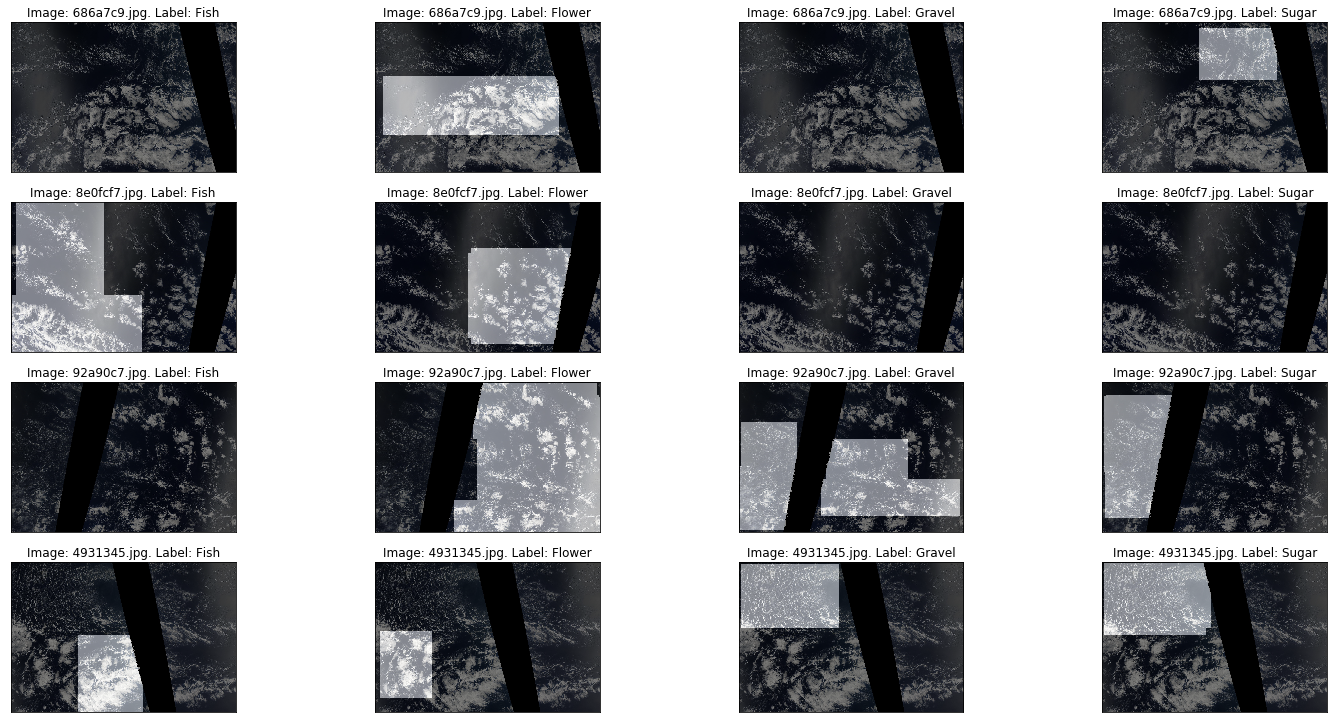

In [14]:
fig = plt.figure(figsize=(25, 16))
for j, im_id in enumerate(np.random.choice(train['im_id'].unique(), 4)):
    for i, (idx, row) in enumerate(train.loc[train['im_id'] == im_id].iterrows()):
        ax = fig.add_subplot(5, 4, j * 4 + i + 1, xticks=[], yticks=[])
        im = Image.open(f"{path}/train_images/{row['Image_Label'].split('_')[0]}")
        plt.imshow(im)
        mask_rle = row['EncodedPixels']
#         print(mask_rle)
        try: # label might not be there!
            mask = rle_decode(mask_rle)
        except:
            mask = np.zeros((1400, 2100))
        plt.imshow(mask, alpha=0.5, cmap='gray')
        ax.set_title(f"Image: {row['Image_Label'].split('_')[0]}. Label: {row['label']}")

We can find that masks can overlap. Another important point: masks are often quite big and can have seemingly empty areas.

### Prepare data for Modeling

In [15]:
sub['label'] = sub['Image_Label'].apply(lambda x: x.split('_')[1])
sub['im_id'] = sub['Image_Label'].apply(lambda x: x.split('_')[0])
sub.head()

,Image_Label,EncodedPixels,label,im_id
0,002f507.jpg_Fish,1 1,Fish,002f507.jpg
1,002f507.jpg_Flower,1 1,Flower,002f507.jpg
2,002f507.jpg_Gravel,1 1,Gravel,002f507.jpg
3,002f507.jpg_Sugar,1 1,Sugar,002f507.jpg
4,0035ae9.jpg_Fish,1 1,Fish,0035ae9.jpg


At first, let's create a list of unique image ids and the count of masks for images. 

In [16]:
id_mask_count = train.loc[train['EncodedPixels'].isnull() == False, 'Image_Label'].apply(lambda x: x.split('_')[0]).value_counts().\
reset_index().rename(columns={'index': 'img_id', 'Image_Label': 'count'})

train_ids, valid_ids = train_test_split(id_mask_count['img_id'].values, random_state=42, stratify=id_mask_count['count'], test_size=0.1)
test_ids = sub['Image_Label'].apply(lambda x: x.split('_')[0]).drop_duplicates().values

### Setting up data for training in Catalyst

In [17]:
class CloudDataset(Dataset):
    def __init__(self, df: pd.DataFrame = None, datatype: str = 'train', img_ids: np.array = None,
                 transforms = albu.Compose([albu.HorizontalFlip(),AT.ToTensor()]),
                preprocessing=None):
        self.df = df
        if datatype != 'test':
            self.data_folder = f"{path}/train_images"
        else:
            self.data_folder = f"{path}/test_images"
        self.img_ids = img_ids
        self.transforms = transforms
        self.preprocessing = preprocessing

    def __getitem__(self, idx):
        image_name = self.img_ids[idx]
        mask = make_mask(self.df, image_name)
        image_path = os.path.join(self.data_folder, image_name)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        augmented = self.transforms(image=img, mask=mask)
        img = augmented['image']
        mask = augmented['mask']
        if self.preprocessing:
            preprocessed = self.preprocessing(image=img, mask=mask)
            img = preprocessed['image']
            mask = preprocessed['mask']
        return img, mask

    def __len__(self):
        return len(self.img_ids)

Now we define model and training parameters

In [18]:
ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
DEVICE = 'cuda'

ACTIVATION = None
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=4, 
    activation=ACTIVATION,
)
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [19]:
num_workers = 0
bs = 16
train_dataset = CloudDataset(df=train, datatype='train', img_ids=train_ids, transforms = get_training_augmentation(), preprocessing=get_preprocessing(preprocessing_fn))
valid_dataset = CloudDataset(df=train, datatype='valid', img_ids=valid_ids, transforms = get_validation_augmentation(), preprocessing=get_preprocessing(preprocessing_fn))

train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(valid_dataset, batch_size=bs, shuffle=False, num_workers=num_workers)

loaders = {
    "train": train_loader,
    "valid": valid_loader
}

/home/kathy9980/anaconda3/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:2908: UserWarning:

Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().



In [20]:
num_epochs = 5
logdir = "./logs/segmentation"

# model, criterion, optimizer
optimizer = torch.optim.Adam([
    {'params': model.decoder.parameters(), 'lr': 1e-2}, 
    {'params': model.encoder.parameters(), 'lr': 1e-3},  
])
scheduler = ReduceLROnPlateau(optimizer, factor=0.15, patience=2)
# criterion = smp.utils.losses.BCEDiceLoss(eps=1.)
criterion = smp.utils.losses.DiceLoss(eps=1.)

runner = SupervisedRunner()

### Model Training

#### Define model and parameters

In [ ]:
runner.train(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    loaders=loaders,
    callbacks=[DiceCallback(), EarlyStoppingCallback(patience=5, min_delta=0.001)],
    logdir=logdir,
    num_epochs=num_epochs,
    verbose=True
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/5 * Epoch (train):   0% 0/312 [00:00<?, ?it/s]

In [26]:
utils.plot_metrics(
    logdir=logdir, 
    # specify which metrics we want to plot
    metrics=["loss", "dice", 'lr', '_base/lr']
)